In [1]:
import numpy as np
import pandas as pd
from numpy.linalg import pinv
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from numpy.linalg import inv
import random
from pprint import pprint
import math

In [2]:

def sigmoid(inX):
    return 1.0/(1+ np.exp(-inX))

In [3]:
word_labels = ["make", "address", "all", "3d", "our", "over", "remove", "internet",
                "order", "mail", "receive", "will", "people", "report", "addresses",
                "free", "business", "email", "you", "credit", "your", "font", "000",
                "money", "hp", "hpl", "george", "650", "lab", "labs", "telnet", "857",
                "data", "415", "85", "technology", "1999", "parts", "pm", "direct", "cs",
                "meeting", "original", "project", "re", "edu", "table", "conference", "char_freq1", "char_freq2", "char_freq3", 
              "char_freq4", "char_freq5", "char_freq6", "cap_run_length_avg", "cap_run_length_longest", "cap_run_length_total", "label"]
df = pd.read_csv("spambase/spambase.data", names = word_labels, header=None) 
df_norm = df.iloc[:, :-1]
df_norm = (df_norm - df_norm.mean()) / df_norm.std()
df = df_norm.join(df.iloc[:, -1])

In [4]:
def train_test_split(df, test_size):
    
    if isinstance(test_size, float):
        test_size = round(test_size * len(df))

    index_list = df.index.tolist()
    test_indices = random.sample(population=index_list, k=test_size)

    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)
    
    return train_df, test_df

In [5]:
random.seed(0)
train_df, test_df = train_test_split(df, test_size=0.20)

In [6]:

x_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]
m,n = np.shape(x_train)
x0 = np.ones((m,1))
x_train = np.c_[x0,x_train]
x_train_mat = np.mat(x_train)
y_train_mat = np.mat(y_train).T


In [7]:
# m = y_train.shape[0]
# theta = np.zeros((x_train.shape[0], 1))

In [8]:
def logistic_newton(x_train_mat, y_train_mat):
    m, n = np.shape(x_train_mat)
    theta = np.mat(np.zeros(n)).T
    h_mat = np.mat(np.zeros((n,n)))
    mult_x_y = np.multiply(y_train_mat, x_train_mat)
    sigmoid_val = sigmoid( -theta.T * mult_x_y.T)
    derive_theta = -1/m * (np.mat(np.ones(m)) * np.multiply(sigmoid_val.T, mult_x_y))
    for i in range(m):
        h_mat += sigmoid(float(theta.T * x_train_mat[i,:].T)) * x_train_mat[i,:].T * x_train_mat[i,:]
    h_mat = h_mat / m
    h_mat_inv = inv(h_mat)
    theta = theta - h_mat_inv * derive_theta.T
    return theta

In [9]:
theta = logistic_newton(x_train_mat, y_train_mat)

In [10]:
theta

matrix([[ 0.39098201],
        [-0.01638377],
        [-0.0157861 ],
        [ 0.01981586],
        [ 0.01397442],
        [ 0.06339577],
        [ 0.02699278],
        [ 0.08600168],
        [ 0.04328194],
        [ 0.01634083],
        [ 0.01074226],
        [ 0.01025998],
        [-0.02587133],
        [ 0.00773039],
        [-0.00282175],
        [ 0.00825836],
        [ 0.05959386],
        [ 0.01533418],
        [ 0.02482111],
        [ 0.02191773],
        [ 0.03170424],
        [ 0.06524813],
        [ 0.04225914],
        [ 0.06171074],
        [ 0.05227035],
        [-0.04040771],
        [-0.01814955],
        [-0.04251366],
        [ 0.00567693],
        [-0.00364759],
        [-0.02284441],
        [-0.01163076],
        [-0.01236501],
        [-0.02282957],
        [ 0.02502815],
        [-0.01556142],
        [ 0.01551609],
        [-0.01273421],
        [-0.01017672],
        [-0.0124707 ],
        [ 0.01478642],
        [-0.00316641],
        [-0.02851032],
        [-0

In [11]:
y_pred = theta.T.dot(x_train.T)
y_pred = np.mat(y_pred)
y_pred.max()

2.463275566385218

In [12]:
y_train_mat = y_train_mat.T
y_train_mat

matrix([[1, 1, 1, ..., 0, 0, 0]])

In [13]:
mse = np.square(y_train_mat - y_pred)
mse = np.mean(mse)
mse

0.10437091048307562

In [14]:
x_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]
m,n = np.shape(x_test)
x0 = np.ones((m,1))
x_test = np.c_[x0,x_test]
x_test_mat = np.mat(x_test)
y_test_mat = np.mat(y_test).T

In [15]:
y_pred = theta.T.dot(x_test.T)
y_pred = np.mat(y_pred)

In [16]:
y_test_mat = y_test_mat.T
y_test_mat

matrix([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
         1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
         0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
         0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
         1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
         1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
         1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
         0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
         0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
         1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
         1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
         1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
         0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
         0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1

In [17]:
mse = np.square(y_test_mat - y_pred)
mse = np.mean(mse)
mse

0.11027470962487855

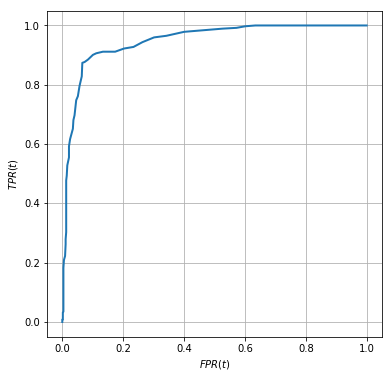

In [18]:
thresholds = np.linspace(10,-10,1000)

ROC = np.zeros((1000,2))
for i in range(1000):
    t = thresholds[i]

   
    TP_t = np.logical_and( y_pred > t, y_test_mat==1 ).sum()
    TN_t = np.logical_and( y_pred <=t, y_test_mat==0 ).sum()
    FP_t = np.logical_and( y_pred > t, y_test_mat==0 ).sum()
    FN_t = np.logical_and( y_pred <=t, y_test_mat==1 ).sum()

  
    FPR_t = FP_t / float(FP_t + TN_t)
    ROC[i,0] = FPR_t


    TPR_t = TP_t / float(TP_t + FN_t)
    ROC[i,1] = TPR_t
    
fig = plt.figure(figsize=(6,6))
plt.plot(ROC[:,0], ROC[:,1], lw=2)
plt.xlabel('$FPR(t)$')
plt.ylabel('$TPR(t)$')
plt.grid()

In [19]:
y_test = np.array(y_test)
y_pred = np.array(y_pred)

In [20]:
threshold = 0.4
y_pred[y_pred < threshold] = 0
y_pred[y_pred > threshold] = 1

In [21]:
print("Accuracy:", np.mean(y_test == y_pred)) 

Accuracy: 0.9
